# lya forest

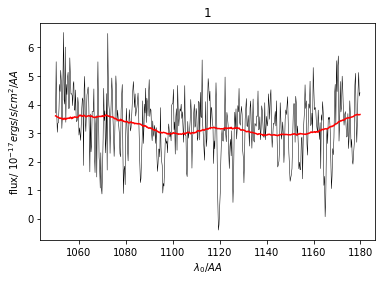

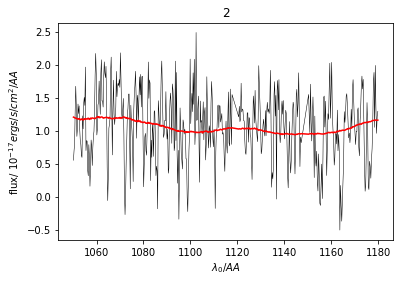

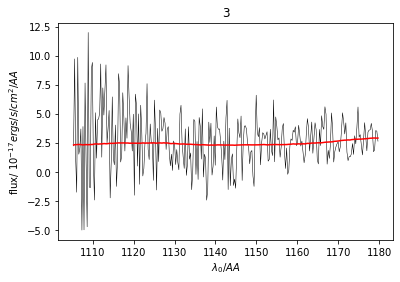

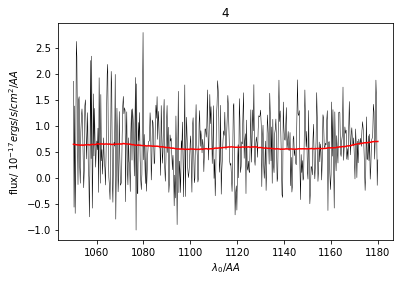

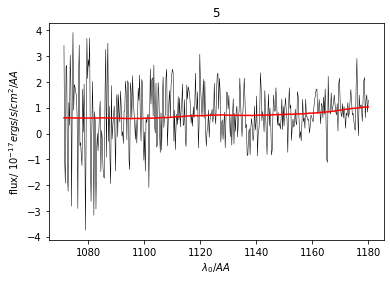

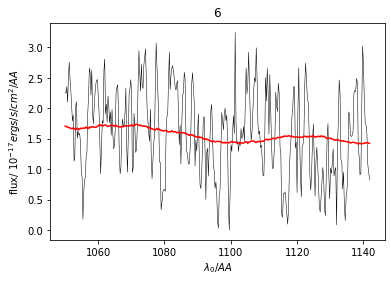

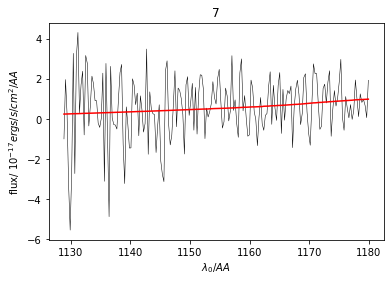

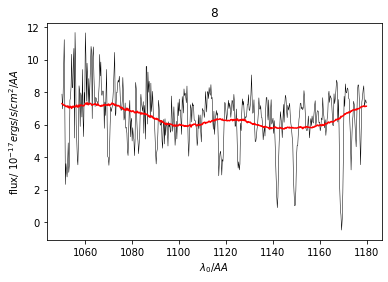

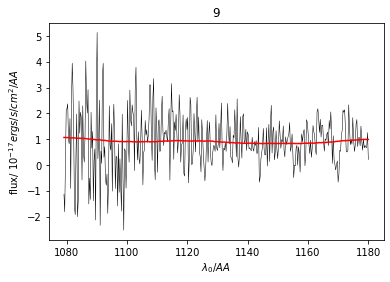

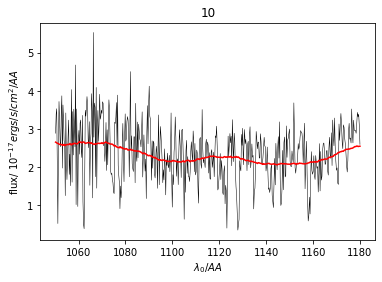

In [12]:
import astropy.io.fits as fits
import numpy as np
import astropy.constants as const
import matplotlib.pyplot as plt


delta_set = fits.open('./deltas/delta-273.fits')

for i in range(1,11,1):
    d = delta_set[i].data
    lam = 10**d['LOGLAM']
    delta = d['DELTA']
    cont = d['CONT']
    z_qso = delta_set[i].header['Z']
    lrf = lam/(1+z_qso)
    
    plt.plot(lrf,(delta+1)*cont,c='k',lw=0.5)
    plt.plot(lrf,cont,c='r')
    plt.xlabel(r'$\lambda_{0}/AA$')
    plt.ylabel(r'flux/ $10^{-17} ergs/s/cm^2/AA$')
    plt.title(i)
    plt.show()

In [9]:
import pyfftw as fftw

z = []
ra = []
dec = []
vel = []

Pk = []
k = []

for index in range(1,len(delta_set)):
    loglam = delta_set[index].data['LOGLAM']
    lam = 10**(loglam)
    delta = delta_set[index].data['DELTA']
    cont = delta_set[index].data['cont']
    z_qso = delta_set[index].header['Z']
    lrf = lam/(1+z_qso)
    w = delta_set[index].data['WEIGHT']
    z_lya = lam/1215.67
    ra_obj = delta_set[index].header['RA']
    dec_obj = delta_set[index].header['DEC']
    
    scp = (lrf>1050)&(lrf<1180)
    lam = lam[scp]
    delta = delta[scp].astype('float')
    
    vel_lya = np.log(lam)*const.c.to('km/s')
    vel_lya = vel_lya-vel_lya[0]

    z.append(z_lya)
    ra.append(ra_obj*np.ones(z_lya.shape))
    dec.append(dec_obj*np.ones(z_lya.shape))
    vel.append(vel_lya)
        
    Delta_vel = abs(vel_lya[1]-vel_lya[0]).value
    
    fft = fftw.builders.rfft(delta)
    pk = fft()
    kk = 2*np.pi*np.fft.rfftfreq(len(vel_lya))/Delta_vel
    Pk.append(pk)
    k.append(kk)
    
z = np.concatenate(z)
ra = np.concatenate(ra)
dec = np.concatenate(dec)
vel = np.concatenate(vel)

Pk = np.array(Pk)
k  = np.array(k)

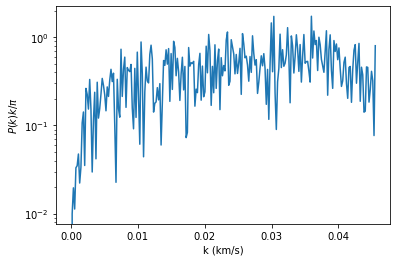

In [10]:
i = 1
plt.plot(k[i],abs(Pk[i])*k[i]*np.pi)
plt.yscale('log')
plt.xlabel('k (km/s)')
plt.ylabel(r'$P(k)k/\pi$')
plt.show()

# side band 1

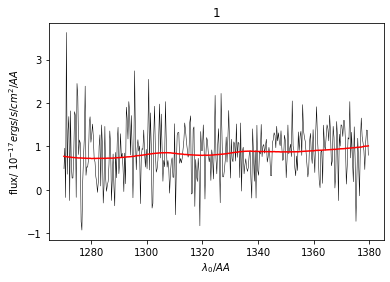

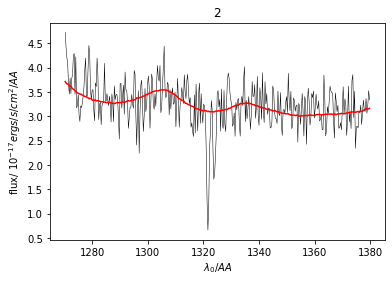

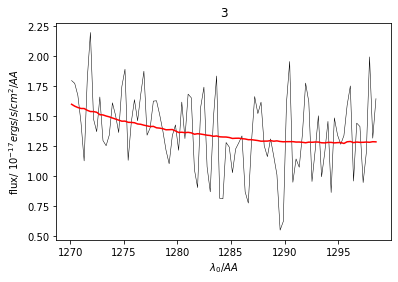

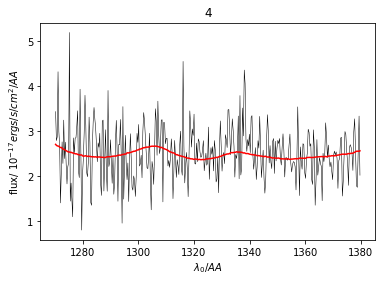

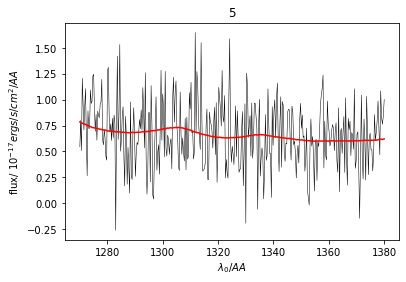

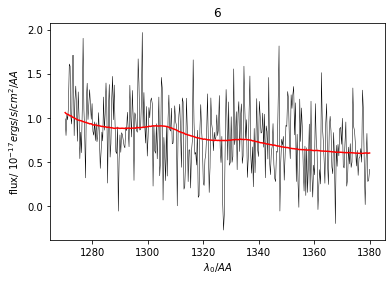

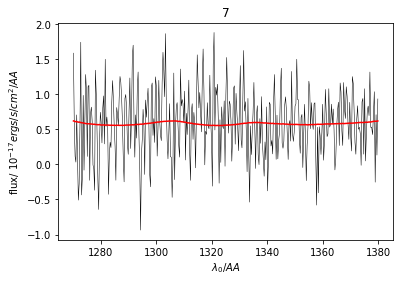

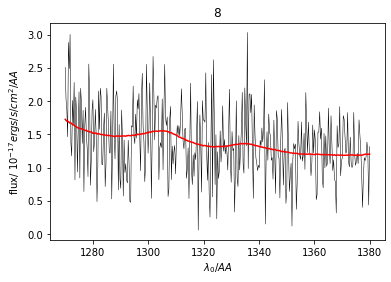

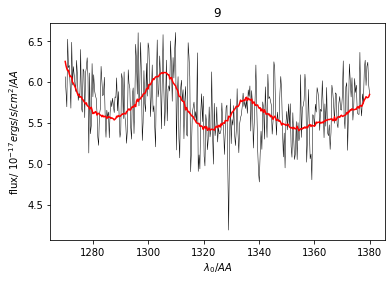

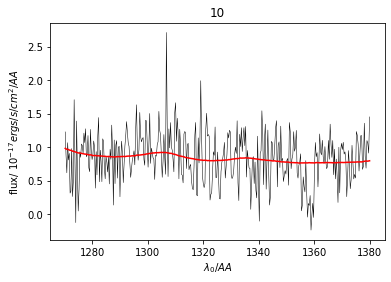

In [13]:
delta_set = fits.open('./side/delta-273.fits')

for i in range(1,11,1):
    d = delta_set[i].data
    lam = 10**d['LOGLAM']
    delta = d['DELTA']
    cont = d['CONT']
    z_qso = delta_set[i].header['Z']
    lrf = lam/(1+z_qso)
    
    plt.plot(lrf,(delta+1)*cont,c='k',lw=0.5)
    plt.plot(lrf,cont,c='r')
    plt.xlabel(r'$\lambda_{0}/AA$')
    plt.ylabel(r'flux/ $10^{-17} ergs/s/cm^2/AA$')
    plt.title(i)
    plt.show()